In [2]:
#follow guidelines as to how to install packages from jupyter notebooks
import sys
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install matplotlib

#For details-> https://stackoverflow.com/questions/43567876/scipy-cannot-be-imported-in-jupyter-notebook

In [4]:
!{sys.executable} -m pip install -r requirements.txt

  Using cached Pillow-7.2.0.tar.gz (39.1 MB)
  Created wheel for Pillow: filename=Pillow-7.2.0-cp39-cp39-linux_x86_64.whl size=1066654 sha256=4a762d48b6fd271393fd025cb4f79a9ab2f8b79839deeba6f42431a3c8b6099a
  Stored in directory: /home/guest/.cache/pip/wheels/d2/4d/44/3fc103a77e1f7e6930a4a24994dbb5ea97eb14ff30c3cd0db6
Successfully built Pillow
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.3.2
    Uninstalling Pillow-8.3.2:
      Successfully uninstalled Pillow-8.3.2


In [68]:
!{sys.executable} -m pip install scikit-learn

     |████████████████████████████████| 24.7 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 5.6 MB/s eta 0:00:01


In [1]:
import matplotlib.pyplot as plt
import torch
import sys

In [2]:
#add a specific path for interpreter to search the RAFT files
sys.path.append('/home/guest/Documents')
#https://www.geeksforgeeks.org/sys-path-in-python/
sys.path

['/home/guest/Documents/SafeCam/ProjectCode',
 '/usr/lib/python39.zip',
 '/usr/lib/python3.9',
 '/usr/lib/python3.9/lib-dynload',
 '',
 '/home/guest/.local/lib/python3.9/site-packages',
 '/usr/local/lib/python3.9/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.9/dist-packages',
 '/home/guest/.local/lib/python3.9/site-packages/IPython/extensions',
 '/home/guest/.ipython',
 '/home/guest/Documents']

In [3]:
import cv2
#openCV
import numpy as np
from scipy.stats import kurtosis,skew
#scipy is the statistical elder brother of numpy
import os
#os helps in fetching files from different directories i.e. communication with the operating system
import pickle
#pickle helps in dumping content of large lists or dictionaries which is then stored in binary format 
#https://www.geeksforgeeks.org/understanding-python-pickling-example/
#https://stackoverflow.com/questions/899103/writing-a-list-to-a-file-with-python/899176

#https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python
from timeit import default_timer as timer
from sklearn import metrics


In [4]:
#importing all relevant RAFT libraries
from raft.core.raft import RAFT
from raft.core.utils import flow_viz
from raft.core.utils.utils import InputPadder
from raft.config import RAFTConfig
from PIL import Image

In [5]:
#OPTICAL FLOW MODEL INITIALIZATION AND PROCESSING
#Setting the configs for our RAFT deep learning model
config = RAFTConfig(
    dropout=0,
    alternate_corr=False,
    small=False,
    mixed_precision=False
)
#generating the model and displaying it
model = RAFT(config)
model

RAFT(
  (fnet): BasicEncoder(
    (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (relu1): ReLU(inplace=True)
    (layer1): Sequential(
      (0): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (norm2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (1): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=Fa

In [6]:
#setting device to run on cuda if nvidia gpu is present on pytorch for RAFT
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#https://stackoverflow.com/questions/48152674/how-to-check-if-pytorch-is-using-the-gpu
print(f'device: {device}')

#loading the pre-alloted weight
weights_path = '/home/guest/Documents/raft-sintel.pth'

ckpt = torch.load(weights_path, map_location=device)
#putting the whole model to the device(gpu or cuda)
model.to(device)
model.load_state_dict(ckpt)
#https://stackoverflow.com/questions/42703500/best-way-to-save-a-trained-model-in-pytorch

device: cuda


<All keys matched successfully>

In [7]:
model.eval()

RAFT(
  (fnet): BasicEncoder(
    (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (relu1): ReLU(inplace=True)
    (layer1): Sequential(
      (0): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (norm2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (1): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=Fa

In [8]:
#OBJECT DETECTION MODEL INITIALIZATION AND PROCESSING
# returns a deep learning network using the yolov4 format
net = cv2.dnn.readNet('yolov4.weights', 'yolov4.cfg')
# cv2.dnn.readNet=>https://docs.opencv.org/3.4/d6/d0f/group__dnn.html#ga3b34fe7a29494a6a4295c169a7d32422
# type net=Net object=>https://docs.opencv.org/3.4/db/d30/classcv_1_1dnn_1_1Net.html

In [9]:
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
#https://docs.opencv.org/3.4/db/d30/classcv_1_1dnn_1_1Net.html#a7f767df11386d39374db49cd8df8f59e
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
#https://docs.opencv.org/3.4/db/d30/classcv_1_1dnn_1_1Net.html#a9dddbefbc7f3defbe3eeb5dc3d3483f4

In [10]:
#verify that gpu is being used, 1 means 1 device is gpu-enabled
#https://stackoverflow.com/questions/61492452/how-to-check-if-opencv-is-using-gpu-or-not
count = cv2.cuda.getCudaEnabledDeviceCount()
print(count)

1


In [11]:
#RAFT FUNCTIONS
def load_image(imfile, device):
    img = np.array(Image.fromarray(imfile)).astype(np.uint8)
    img = torch.from_numpy(img).permute(2, 0, 1).float()
    return img[None].to(device)


def viz(img1, img2, flo):
    img1 = img1[0].permute(1,2,0).cpu().numpy()
    img2 = img2[0].permute(1,2,0).cpu().numpy()
    flo = flo[0].permute(1,2,0).cpu().numpy()
    # map flow to rgb image
    flo = flow_viz.flow_to_image(flo)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
    ax1.set_title('input image1')
    ax1.imshow(img1.astype(int))
    ax2.set_title('input image2')
    ax2.imshow(img2.astype(int))
    ax3.set_title('estimated optical flow')
    ax3.imshow(flo)
    plt.show()


In [12]:
#RAFT FUNCTIONS
def flow_res(file1,file2):
    #n_vis = 4
    
    image1 = load_image(file1, device)
    image2 = load_image(file2, device)
    
    padder = InputPadder(image1.shape)
    
    image1, image2 = padder.pad(image1, image2)
    
    #no backpropogation
    #https://datascience.stackexchange.com/questions/32651/what-is-the-use-of-torch-no-grad-in-pytorch
    with torch.no_grad():
        flow_low, flow_up = model(image1, image2, iters=20, test_mode=True)
        
    #viz(image1, image2, flow_up)
    
    flo = flow_up[0].permute(1,2,0).cpu().numpy()
    return flo


In [13]:
def write_file(filename,itemlist):
    #dumping contents of train vector onto file through pickle, which is more efficient
    pickle_out=open(filename,"wb")
    pickle.dump(itemlist,pickle_out)
    pickle_out.close()
    #https://pythonprogramming.net/python-pickle-module-save-objects-serialization/

In [14]:
def get_flow_patches(flow,boxes,idx):
    flows=[]
    if len(idx)>0:
        for i in idx.flatten():
            center_x,center_y,w,h=boxes[i]
            x=int(center_x-(w/2))
            y=int(center_y-(h/2))
            subx=0
            suby=0
            
            if x<0 or x>=flow.shape[1]:
                subx=x if x<0 else -1*x
                x=0 if x<0 else flow.shape[1]-1
            if y<0 or y>=flow.shape[0]:
                suby=y if y<0 else -1*y
                y=0 if y<0 else flow.shape[0]-1
            flows.append(flow[y:y+int(h)+suby,x:x+int(w)+subx,:])
    return flows

In [15]:
def frames_process_raft(frames_path, feature_matrix):
    frame_prev=None
    for img in np.sort(os.listdir(frames_path)):
        
        if img.endswith(".jpg"):
            image_path=os.path.join(frames_path,img)
            #print(image_path)
            # for running optical flow algorithm we need previous frame as well
            if frame_prev is None:
                frame_prev=cv2.imread(image_path)
                #imread->https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/
                continue
            
            frame=cv2.imread(image_path)
            
            (height, width, _) = frame.shape
            #APPLYING OPTICAL FLOW ON THE FRAMES
            flow=flow_res(frame_prev,frame)
            # RUNNING YOLOv4 OBJECT DETECTION 
            # preprocessing the frame before feeding it to the neural net.
            # scale the pixel values to 1/255=>1/255
            # Resizing frame to (416,416) pixels as yolov4 architecture works on frame of that size.
            # No mean supplied to the three R,G,B channels=>(0,0,0)
            # OpenCV assumes images are in BGR channel order, thus we must swap the R and B channels of the original RGB frame=> swapRB=true
            # No cropping of the frame=>crop=False
            blob = cv2.dnn.blobFromImage(frame,1 / 255,(416, 416),(0, 0, 0),swapRB=True,crop=False)
            # above parameters are needed for yolov4 detection!
            # cv2.dnn.blobFromImage=> creates processed 4-dimensional blob for use in our neural net.Further info=> https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/

            # setting input to neural net
            net.setInput(blob)

            # net.getUnconnectedOutLayers(): It gives you the final layers number in the list from net.getLayerNames().
            output_layer_names = net.getUnconnectedOutLayersNames()

            # Runs forward pass to compute output of layer with name outputName
            layerOutputs = net.forward(output_layer_names)

            # model output=>https://stackoverflow.com/questions/57112038/yolo-v3-model-output-clarification-with-keras
            # There are 3 output layers in YOLO for 3 different resolutions of grid boxes over which object is detected(13,13)(26,26)(52,52)

            # boxes stores the location properties of detected objects
            # confidences stores the confidence score of detecting that object

            boxes = []
            confidences = []
            appearance = []

            # traversing through the 3 outputs at varying resolution

            for output in layerOutputs:
                for detection in output:
                    # detection holds the location(first 5 elements) and class probabilities(rest 80 elements)
                    scores = detection[5:]

                    # selecting the index of maximum class probabilty of total 80 classes and its probability value as well

                    class_id = np.argmax(scores)
                    confidence = scores[class_id]

                    # check to filter objects we are entirely sure belong to some class

                    if confidence > 0.6:

                        # Extracting the center coordinates of the bounding box
                        # we need to convert back to original dimensions thus multiply by width,height is important
                        # print(detection[0])

                        center_x = detection[0] * width
                        center_y = detection[1] * height

                        # extracting the width and height of bounding box

                        w = detection[2] * width
                        h = detection[3] * height
                        boxes.append([center_x, center_y, w, h])
                        confidences.append(float(confidence))
                        appearance.append(scores)

            indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.6, 0.4)

            # NMSBoxes=>https://towardsdatascience.com/non-maximum-suppression-nms-93ce178e177c

            i = 0
            if boxes != []:
                # extract flow ptached corresponsing to bounding box coordinates for detected objects
                flows=get_flow_patches(flow,boxes,indexes)
                #print(np.array(flows).shape)
                
                if flows!=[]:
                    for flow_patch in flows:
                        #mag, _ = cv2.cartToPolar(flow_patch[..., 0], flow_patch[..., 1])
                        u = flow_patch[:,:,0]
                        v = flow_patch[:,:,1]
                        mag = np.sqrt(np.square(u) + np.square(v))
                        #computing mean, variance, kurtosis and skew of the magnitude of velocity vectors
                        #motion metric
                        mean=np.mean(mag)
                        variance=np.var(mag)
                        kurtosis_=kurtosis(mag,None)
                        skew_=skew(mag,None)
                        #location metric
                        cx,cy,wi,hi=boxes[indexes.flatten()[i]]
                        
                        #appearance[indexes.flatten()[i]]-> appearance metric
                        
                        #now creating feature vector for the object and appending feature vector of given object to feature matrix along with their weight
                        feature_matrix.append([mean,variance,kurtosis_,skew_]+[0.4*cx,0.4*cy,0.4*wi*hi]+list(0.9*appearance[indexes.flatten()[i]]))
                        
                        i=i+1
               

            # updating previous frame

            frame_prev = frame
        
    cv2.destroyAllWindows()

In [16]:
def frames_process(frames_path, feature_matrix):
    frame_prev=None
    for img in np.sort(os.listdir(frames_path)):
        
        if img.endswith(".jpg"):
            image_path=os.path.join(frames_path,img)
            #print(image_path)
            # for running optical flow algorithm we need previous frame as well
            if frame_prev is None:
                frame_prev=cv2.imread(image_path)
                #imread->https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/
                continue
            
            frame=cv2.imread(image_path)
            
            (height, width, _) = frame.shape
            
            #APPLYING OPTICAL FLOW ON THE FRAMES
            #Preprocessing to gray scale
            prvs=cv2.cvtColor(frame_prev,cv2.COLOR_BGR2GRAY)
            curr=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            #Dense optical flow algorithm
            flow=cv2.calcOpticalFlowFarneback(prvs, curr, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            
            # RUNNING YOLOv4 OBJECT DETECTION 
            # preprocessing the frame before feeding it to the neural net.
            # scale the pixel values to 1/255=>1/255
            # Resizing frame to (416,416) pixels as yolov4 architecture works on frame of that size.
            # No mean supplied to the three R,G,B channels=>(0,0,0)
            # OpenCV assumes images are in BGR channel order, thus we must swap the R and B channels of the original RGB frame=> swapRB=true
            # No cropping of the frame=>crop=False
            blob = cv2.dnn.blobFromImage(frame,1 / 255,(416, 416),(0, 0, 0),swapRB=True,crop=False)
            # above parameters are needed for yolov4 detection!
            # cv2.dnn.blobFromImage=> creates processed 4-dimensional blob for use in our neural net.Further info=> https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/

            # setting input to neural net
            net.setInput(blob)

            # net.getUnconnectedOutLayers(): It gives you the final layers number in the list from net.getLayerNames().
            output_layer_names = net.getUnconnectedOutLayersNames()

            # Runs forward pass to compute output of layer with name outputName
            layerOutputs = net.forward(output_layer_names)

            # model output=>https://stackoverflow.com/questions/57112038/yolo-v3-model-output-clarification-with-keras
            # There are 3 output layers in YOLO for 3 different resolutions of grid boxes over which object is detected(13,13)(26,26)(52,52)

            # boxes stores the location properties of detected objects
            # confidences stores the confidence score of detecting that object

            boxes = []
            confidences = []
            appearance = []

            # traversing through the 3 outputs at varying resolution

            for output in layerOutputs:
                for detection in output:
                    # detection holds the location(first 5 elements) and class probabilities(rest 80 elements)
                    scores = detection[5:]

                    # selecting the index of maximum class probabilty of total 80 classes and its probability value as well

                    class_id = np.argmax(scores)
                    confidence = scores[class_id]

                    # check to filter objects we are entirely sure belong to some class

                    if confidence > 0.6:

                        # Extracting the center coordinates of the bounding box
                        # we need to convert back to original dimensions thus multiply by width,height is important
                        # print(detection[0])

                        center_x = detection[0] * width
                        center_y = detection[1] * height

                        # extracting the width and height of bounding box

                        w = detection[2] * width
                        h = detection[3] * height
                        boxes.append([center_x, center_y, w, h])
                        confidences.append(float(confidence))
                        appearance.append(scores)

            indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.6, 0.4)

            # NMSBoxes=>https://towardsdatascience.com/non-maximum-suppression-nms-93ce178e177c

            i = 0
            if boxes != []:
                # extract flow ptached corresponsing to bounding box coordinates for detected objects
                flows=get_flow_patches(flow,boxes,indexes)
                
                if flows!=[]:
                    for flow_patch in flows:
                        mag, _ = cv2.cartToPolar(flow_patch[..., 0], flow_patch[..., 1])
                        
                        #computing mean, variance, kurtosis and skew of the magnitude of velocity vectors
                        #motion metric
                        mean=np.mean(mag)
                        variance=np.var(mag)
                        kurtosis_=kurtosis(mag,None)
                        skew_=skew(mag,None)
                        
                        #location metric
                        cx,cy,wi,hi=boxes[indexes.flatten()[i]]
                        
                        #appearance[indexes.flatten()[i]]-> appearance metric
                        
                        #now creating feature vector for the object and appending feature vector of given object to feature matrix along with their weight
                        feature_matrix.append([mean,variance,kurtosis_,skew_]+[0.4*cx,0.4*cy,0.4*wi*hi]+list(0.9*appearance[indexes.flatten()[i]]))
                        
                        i=i+1
               

            # updating previous frame

            frame_prev = frame
        
    cv2.destroyAllWindows()

In [17]:
def vid_process_raft(video_path,feature_matrix):
    cap=cv2.VideoCapture(video_path)
    if(cap.isOpened()==False): 
        print("Error connecting to camera")
        return -1
    ret,frame_prev=cap.read()
    if ret==False:
        print("Error loading frame")
        return
    while cap.isOpened():
        ret,frame=cap.read()
        if ret:
            height,width,_=frame.shape
            #start=timer()
            flow=flow_res(frame_prev,frame)
            #end=timer()
            #print("Frame completed in ",end-start, " seconds")
            
            blob=cv2.dnn.blobFromImage(frame,1/255,(416,416),(0,0,0),swapRB=True,crop=False)
            net.setInput(blob)
            output_layer_names=net.getUnconnectedOutLayersNames()
            layerOutputs=net.forward(output_layer_names)
            boxes=[]
            confidences=[]
            appearance=[]
            for output in layerOutputs:
                for detection in output:
                    scores=detection[5:]
                    class_id=np.argmax(scores)
                    confidence=scores[class_id]
                    if(confidence>0.6):
                        center_x=detection[0]*width
                        center_y=detection[1]*height
                        w=detection[2]*width
                        h=detection[3]*height
                        boxes.append([center_x,center_y,w,h])
                        confidences.append(float(confidence))
                        appearance.append(scores)
            
            indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.6,0.4)
            i=0
            if boxes!=[]:
                flows=get_flow_patches(flow,boxes,indexes)
                if flows!=[]:
                    for flow_patch in flows:
                        mag, _ = cv2.cartToPolar(flow_patch[..., 0], flow_patch[..., 1])
                        mean=np.mean(mag)
                        variance=np.var(mag)
                        kurtosis_=kurtosis(mag,None)
                        skew_=skew(mag,None)
                        cx,cy,wi,hi=boxes[indexes.flatten()[i]]
                        feature_matrix.append([mean,variance,kurtosis_,skew_]+[0.4*cx,0.4*cy,0.4*wi*hi]+list(0.9*appearance[indexes.flatten()[i]]))
                        i=i+1
            frame_prev=frame
            key=cv2.waitKey(1)
            if(key==27):
                break
        else:
            print("End of frames")
            return
    cap.release()
    cv2.destroyAllWindows()

In [18]:
def vid_process(video_path,feature_matrix):
    #get video capture object for the camera for the specified video file 
    cap=cv2.VideoCapture(video_path)
    
    #Sometimes, cap may not have initialized the capture. 
    #You can check whether it is initialized or not by the method cap.isOpened().
    if(cap.isOpened()==False): 
        print("Error connecting to camera")
        return -1
    
    #for running optical flow algorithm we need previous frame as well
    ret,frame_prev=cap.read()
    #cap.read() returns a bool (True/False) which is stored in "ret" here. 
    #If the frame is read correctly, it will be True    
    
    if ret==False:
        print("Error loading frame")
        return
    while cap.isOpened():
        
        ret,frame=cap.read()
        
        if ret:
            #storing original frame dimensions
            height,width,_=frame.shape
            
            #APPLYING OPTICAL FLOW ON THE FRAMES
            #Preprocessing to gray scale
            prvs=cv2.cvtColor(frame_prev,cv2.COLOR_BGR2GRAY)
            curr=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            #Dense optical flow algorithm
            flow=cv2.calcOpticalFlowFarneback(prvs, curr, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            
            #RUNNING YOLOv4 OBJECT DETECTION now
            #preprocessing the frame before feeding it to the neural net. 
            #scale the pixel values to 1/255=>1/255
            #Resizing frame to (416,416) pixels as yolov4 architecture works on frame of that size.
            #No mean supplied to the three R,G,B channels=>(0,0,0)
            #OpenCV assumes images are in BGR channel order, thus we must swap the R and B channels of the original RGB frame=> swapRB=true
            #No cropping of the frame=>crop=False
            blob=cv2.dnn.blobFromImage(frame,1/255,(416,416),(0,0,0),swapRB=True,crop=False)
            #above parameters are needed for yolov4 detection!
            #cv2.dnn.blobFromImage=> creates processed 4-dimensional blob for use in our neural net.Further info=> https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
            
            #setting input to neural net
            net.setInput(blob)
            
            #net.getUnconnectedOutLayers(): It gives you the final layers number in the list from net.getLayerNames().
            output_layer_names=net.getUnconnectedOutLayersNames()
            
            #Runs forward pass to compute output of layer with name outputName
            layerOutputs=net.forward(output_layer_names)
            #model output=>https://stackoverflow.com/questions/57112038/yolo-v3-model-output-clarification-with-keras
            #There are 3 output layers in YOLO for 3 different resolutions of grid boxes over which object is detected(13,13)(26,26)(52,52)
            
            #boxes stores the location properties of detected objects
            #confidences stores the confidence score of detecting that object
            boxes=[]
            confidences=[]
            appearance=[]
            
            #traversing through the 3 outputs at varying resolution
            for output in layerOutputs:
                for detection in output:
                    #detection holds the location(first 5 elements) and class probabilities(rest 80 elements)
                    scores=detection[5:]
                    #print(scores)
                    #selecting the index of maximum class probabilty of total 80 classes and its probability value as well
                    class_id=np.argmax(scores)
                    confidence=scores[class_id]
                    #check to filter objects we are entirely sure belong to some class
                    if(confidence>0.6):
                        #Extracting the center coordinates of the bounding box
                        #we need to convert back to original dimensions thus multiply by width,height is important
                        #print(detection[0])
                        center_x=detection[0]*width
                        center_y=detection[1]*height
                        #extracting the width and height of bounding box
                        w=detection[2]*width
                        h=detection[3]*height
                        boxes.append([center_x,center_y,w,h])
                        confidences.append(float(confidence))
                        appearance.append(scores)
            
            indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.6,0.4)
            #NMSBoxes=>https://towardsdatascience.com/non-maximum-suppression-nms-93ce178e177c
            i=0
            if boxes!=[]:
                
                #extract flow area corresponsing to bounding box coordinates for detected objects
                flows=get_flow_patches(flow,boxes,indexes)
                if flows!=[]:
                    for flow_patch in flows:
                        mag, _ = cv2.cartToPolar(flow_patch[..., 0], flow_patch[..., 1])
                        #computing mean, variance, kurtosis and skew of the magnitude of velocity vectors
                        #motion metric
                        mean=np.mean(mag)
                        variance=np.var(mag)
                        kurtosis_=kurtosis(mag,None)
                        skew_=skew(mag,None)
                        #location metric
                        cx,cy,wi,hi=boxes[indexes.flatten()[i]]
                        #appearance[indexes.flatten()[i]]-> appearance metric
                        #now creating feature vector for the object and appending feature vector of given object to feature matrix along with their weight
                        feature_matrix.append([mean,variance,kurtosis_,skew_]+[0.4*cx,0.4*cy,0.4*wi*hi]+list(0.9*appearance[indexes.flatten()[i]]))
                        i=i+1
                        
                        
            #updating previous frame            
            frame_prev=frame
            key=cv2.waitKey(1)
            
            #cv2.waitKey([delay])=>The function waitKey waits for a key event infinitely and the delay is in milliseconds. waitKey(0) means forever.
            #For more details=>https://stackoverflow.com/questions/57690899/how-cv2-waitkey1-0xff-ordq-works
            
            #if pressed key has ASCII value 27 i.e q
            if(key==27):
                break
            
            #if len(indexes)>0:
            #for i in indexes.flatten():                        
            
        else:
            print("End of frames")
            return
    cap.release()
    cv2.destroyAllWindows()

In [19]:
curr_direc=os.path.dirname(os.getcwd())
parent_direc=os.path.join(curr_direc,'Dataset')

In [20]:
TEST_FRAMES_MAPPING={
    'avenue':os.path.join(parent_direc,'avenue','testing','frames'),
    'ped2':os.path.join(parent_direc,'ped2','testing','frames'),
    'shangai':os.path.join(parent_direc,'ShangaiTech_testing','testing','frames')
}

In [21]:
TRAIN_FRAMES_MAPPING={
    'avenue':os.path.join(parent_direc,'avenue','training','frames'),
    'ped2':os.path.join(parent_direc,'ped2','training','frames'),
    'shangai':os.path.join(parent_direc,'ShangaiTech_testing','testing','frames')
}

In [22]:
NPY_MAPPING={
    'avenue':'avenuelabels.npy',
    'ped2':'pedlabels.npy'
}

In [23]:
def normalize(train_feature_matrix):
    #Applying normalization
    #np.min(matrix,axis) axis=0 implies apply minimum downwards i.e all rows in a column
    g_min=np.min(train_feature_matrix,0)
    g_max=np.max(train_feature_matrix,0)
    print("g_min",g_min)
    print("g_max",g_max)
    for i in range(0,87):
        #normalization applied to all features where it is valid
        if g_min[i]!=g_max[i]:
            train_feature_matrix[:,i]=(train_feature_matrix[:,i]-g_min[i])/(g_max[i]-g_min[i])
    return g_min,g_max

In [24]:
def store(train_vector,dataset):
    #randomly shuffling the feature matrix
    #print(train_vector)
    np.random.shuffle(train_vector)
    #random.shuffle-> shuffle contents of array inplace along the first axis of multi-array. 
    #for more details->https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html
    #converting to np array for later modifications
    train_feature_matrix=np.array(train_vector)
    print("Shape of train-vector: ",train_feature_matrix.shape)
    g_min,g_max=normalize(train_feature_matrix)
    write_file(dataset+'_list_norm.pickle',train_feature_matrix)
    return g_min,g_max


In [25]:
def train(dataset):
    #TRAINING THE DATASET
    train_vector=[]
    for subdirec in os.listdir(TRAIN_FRAMES_MAPPING[dataset]):
        video_frames=os.path.join(TRAIN_FRAMES_MAPPING[dataset],subdirec)
        print(video_frames)
        start=timer()
        frames_process_raft(video_frames,train_vector)
        end=timer()
        print("Video completed in ",end-start, " seconds")
    return train_vector

In [26]:
import numpy.matlib
def knndis(t,M2):
    #A vectorised implementation of finding KNN distance between a single point and the M2 matrix
    Mg=M2.shape[0]
    #this will replicate the feature vector of 't' Mg times columnwise. 
    #To subtract, transpose is taken to make it compatible
    #Sum is taken of each row
    
    dist=np.sqrt(np.sum((np.matlib.repmat(t,Mg,1) - M2)**2,1))
    #np.matlib.repmat->Repeat given matrix columnwise(mg) and rowise(1)-> https://numpy.org/doc/stable/reference/generated/numpy.matlib.repmat.html
    
    #sorting the distance according to ascending order
    np.sort(dist)
    
    #return the sum of first 10 neighbours i.e k=10
    return sum(dist[0:10])/10

In [27]:
def params(train_feature_matrix):
    #Keeps track of di for all object i. 
    errors=list()
    #as given in the paper, split the training dataset into M1 and M2. Here 20% of training dataset goes to M1. 
    p1=int(train_feature_matrix.shape[0]*0.2)
    p2=train_feature_matrix.shape[0]-p1
    M1=train_feature_matrix[0:p1]
    M2=train_feature_matrix[p1:None] 
    #Finding the KNN distance for all the points in M1
    for i in range(p1):
        
        errors.append(knndis(M1[i],M2)) 
    return errors,M2


In [28]:
def findBase(errors):
    #Using base thresold as one where 90% of KNN distance is lesser
    Base_lm = np.sort(errors)[int(len(errors)*0.9)]
    print("Base score",Base_lm)
    print("Lowest knn distance",np.sort(errors)[0])
    print("Highest knn distance",np.sort(errors)[len(errors)-1])
    return Base_lm,np.sort(errors)[len(errors)-1]

In [29]:
def find_score(AV2,dataset):
    sc = [item for sublist in AV2 for item in sublist]
    labels = np.load(NPY_MAPPING[dataset],mmap_mode=None, allow_pickle=True, fix_imports=True)
    labels=np.concatenate(labels).ravel().tolist()
    print(len(labels))
    print(len(sc))
    fpr2, tpr2, thresholds = metrics.roc_curve(labels,sc,pos_label=1)
    fpr2 = np.sort(np.append(fpr2,(0.45))) # We extrapolate a point so as to complete the ROC curve
    tpr2 = np.sort(np.append(tpr2,(1)))
    #print('ODIT AUC:', metrics.auc(fpr2, tpr2))
    return metrics.auc(fpr2, tpr2)

In [45]:
def frames_process_test(frames_path,AV2,M2,g_min,g_max,Base_lm,threshold):
    St=[0]
    num=0
    frame_prev=None
    fine_tune=False
    count=0
    for img in np.sort(os.listdir(frames_path)):
        if img.endswith(".jpg"):
            image_path=os.path.join(frames_path,img)
            if frame_prev is None:
                frame_prev=cv2.imread(image_path)
                continue
            frame=cv2.imread(image_path)
            (height, width, _) = frame.shape
            flow=flow_res(frame_prev,frame)
            blob = cv2.dnn.blobFromImage(frame,1 / 255,(416, 416),(0, 0, 0),swapRB=True,crop=False)
            net.setInput(blob)
            output_layer_names = net.getUnconnectedOutLayersNames()
            layerOutputs = net.forward(output_layer_names)
            boxes = []
            confidences = []
            appearance = []
            for output in layerOutputs:
                for detection in output:
                    scores = detection[5:]
                    class_id = np.argmax(scores)
                    confidence = scores[class_id]
                    if confidence > 0.4:
                        center_x = detection[0] * width
                        center_y = detection[1] * height
                        w = detection[2] * width
                        h = detection[3] * height
                        boxes.append([center_x, center_y, w, h])
                        confidences.append(float(confidence))
                        appearance.append(scores)
            indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.6, 0.4)
            i = 0
            t=list()
            if boxes != []:
                flows=get_flow_patches(flow,boxes,indexes)
                if flows!=[]:
                    for flow_patch in flows:
                        u = flow_patch[:,:,0]
                        v = flow_patch[:,:,1]
                        mag = np.sqrt(np.square(u) + np.square(v))
                        mean=np.mean(mag)
                        variance=np.var(mag)
                        kurtosis_=kurtosis(mag,None)
                        skew_=skew(mag,None)
                        cx,cy,wi,hi=boxes[indexes.flatten()[i]]
                        test_matrix=np.array([mean,variance,kurtosis_,skew_]+[0.4*cx,0.4*cy,0.4*wi*hi]+list(0.9*appearance[indexes.flatten()[i]]))
                        for j in range(0,87):
                            #normalization applied to all features where it is valid
                            if g_min[j]!=g_max[j]:
                                test_matrix[j]=(test_matrix[j]-g_min[j])/(g_max[j]-g_min[j])
                        t.append(knndis(test_matrix,M2))
                        #print(t)
                        i=i+1
            d=(np.max(t)-Base_lm)
            St.append(np.max((0,St[num]+d)))
            #print(d," ",St)
            if fine_tune==True and num > 5:
                if St[num+1] - St[num] <=0:
                    if St[num] - St[num-1] <=0:
                        if St[num-1] - St[num-2] <=0:
                            St[num+1] = 0
                            fine_tune=False
            if(St[num+1]>threshold):
                #print(St)
                fine_tune=True
            #print(St[num+1])
            '''if fine_tune==True:
                if(np.max((0,St[num]+d))>St[num]):
                    St.append(np.max((0,St[num]+d)))
                else:
                    
            else:
                fine_tune=False
                count=0
                St.append(np.max(0,d))
            
            if St[num+1]>threshold:
                fine_tune=True
            
            print(St[num+1])'''
            frame_prev = frame
            num=num+1
    #idx=np.where(np.array(vid)>threshold)
    cv2.destroyAllWindows()
    '''
    St.pop(0)
    
    idx = np.where(np.array(St)>0)[0]

    for id1 in range(0,len(idx)-6):
        if idx[id1+6] - idx[id1] >= 10:
            St[idx[id1]] = 0
    
    for id2 in range(0,len(idx)-50):
        if idx[id2+50] - idx[id2] >= 54:
            St[idx[id2]] = 0
            
    for id1 in range(0,len(idx)-6):
        if idx[id1+5] - idx[id1] >= 6:
            St[idx[id1]] = 0
            '''
    #St.pop(0)
    
    plt.plot(St/np.max(St))
    plt.axhline(y=threshold/np.max(St), color='r', linestyle='-')
    plt.show()
    plt.plot(1*(St/np.max(St)>(threshold/np.max(St))))
    plt.show()
    AV2.append(1*(St/np.max(St)>(threshold/np.max(St))))


In [31]:
def test(Base_lm,threshold,dataset,M2,g_min,g_max):
    AV2=list()
    for subdirec in np.sort(os.listdir(TEST_FRAMES_MAPPING[dataset])):
        video_frames=os.path.join(TEST_FRAMES_MAPPING[dataset],subdirec)
        start=timer()
        frames_process_test(video_frames,AV2,M2,g_min,g_max,Base_lm,threshold)
        end=timer()
        print("Video completed in ",end-start, " seconds")
    print("AV2\n",AV2)
    score=find_score(AV2,dataset)
    print("For Base_lm = ",Base_lm," And threshold = ",threshold," score is", score)

In [32]:
def open_(dataset,g_min,g_max):
    #opening the contents of the pickle file in reading mode
    pickle_in=open(dataset+"_list_norm.pickle","rb")
    #loading the stored np array
    train_feature_matrix=pickle.load(pickle_in)
    for i in range(1):
        np.random.shuffle(train_feature_matrix)
        errors,M2=params(train_feature_matrix)
        print(len(errors))
        #plt.plot(np.sort(errors)[0:len(errors)])
        Base_lm, threshold=findBase(errors)
        test(Base_lm,threshold,'avenue',M2,g_min,g_max)

In [49]:
train_vector=train('avenue')
g_min,g_max=store(train_vector,'avenue')

/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/01
Video completed in  165.78193990900036  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/08
Video completed in  130.53616005100048  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/03
Video completed in  198.45594725800038  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/04
Video completed in  204.26744658399912  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/13
Video completed in  49.34260559100221  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/09
Video completed in  189.60365900399847  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/06
Video completed in  206.38824520499838  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/16
Video completed in  34.6903567570007  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/15
Video completed in  49.10632073200031  seco

20179
Base score 0.6630195582961104
Lowest knn distance 0.26012037714059205
Highest knn distance 1.503979111463606


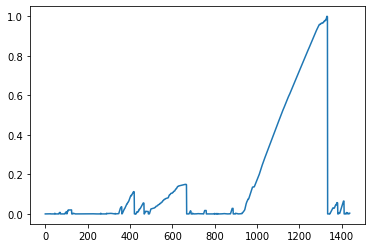

Video completed in  536.1483530830001  seconds


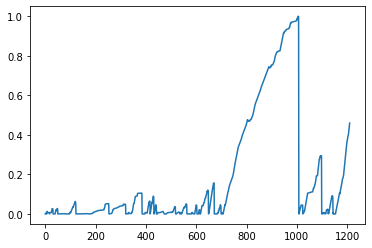

Video completed in  493.64845593799987  seconds


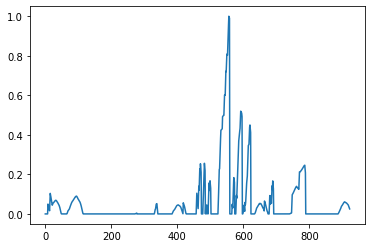

Video completed in  340.51329870400014  seconds


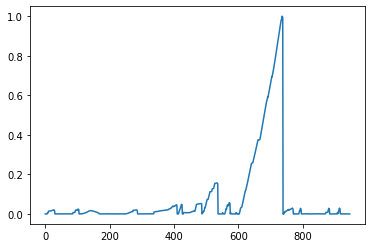

Video completed in  381.7622876290002  seconds


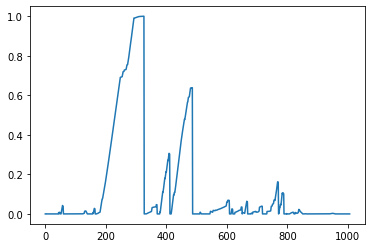

Video completed in  383.880298302  seconds


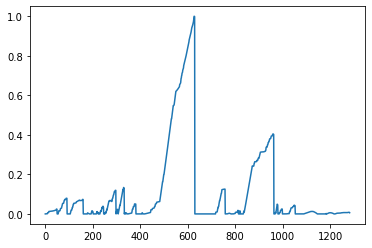

Video completed in  496.1177793619995  seconds


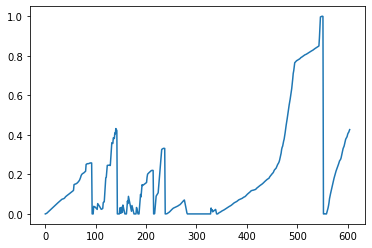

Video completed in  287.072222236  seconds


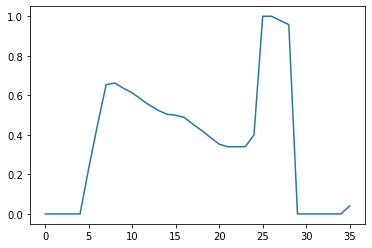

Video completed in  11.40822487999958  seconds


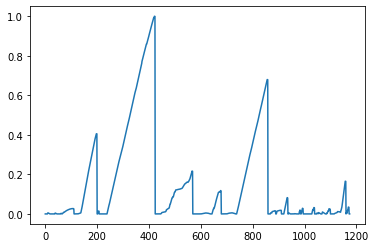

Video completed in  437.8561054710008  seconds


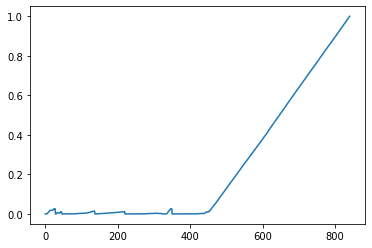

Video completed in  346.95845246499994  seconds


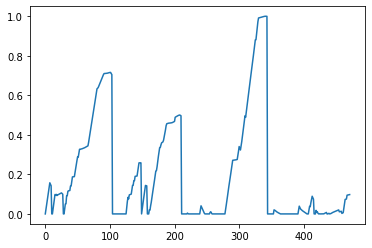

Video completed in  199.33325849600078  seconds


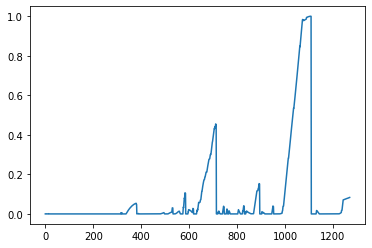

Video completed in  380.99593306600036  seconds


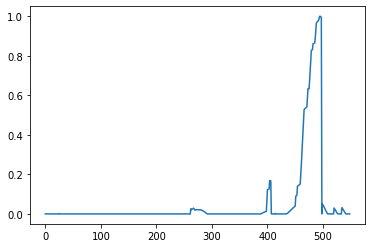

Video completed in  129.4832072019999  seconds


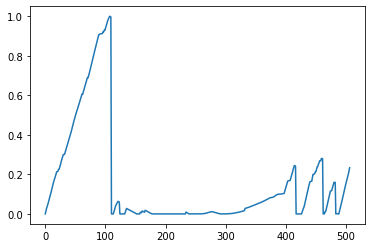

Video completed in  230.50210905100084  seconds


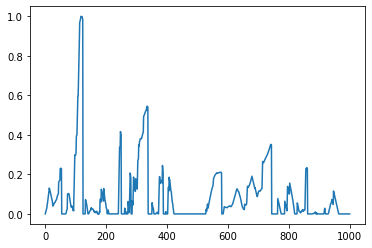

Video completed in  478.9610180339996  seconds


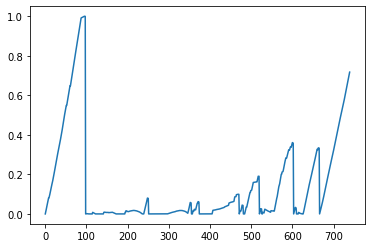

Video completed in  366.98305632400024  seconds


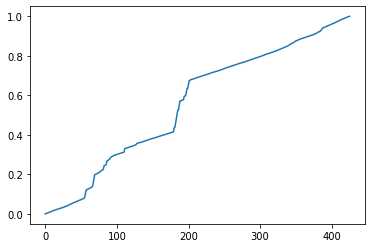

Video completed in  226.16428175300007  seconds


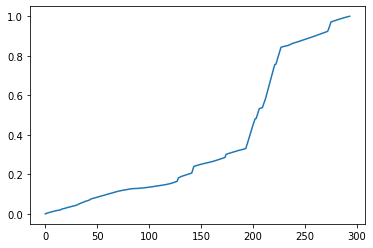

Video completed in  150.58198004299993  seconds


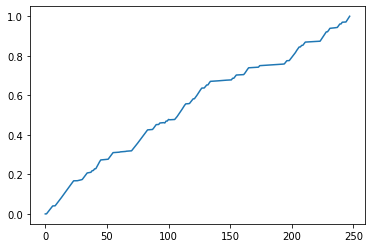

Video completed in  163.2024054049998  seconds


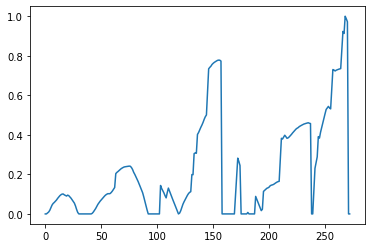

Video completed in  124.83440066799994  seconds


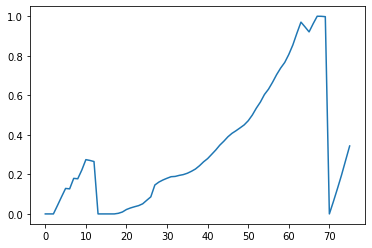

Video completed in  36.51315046899981  seconds
AV2
 [array([0.        , 0.        , 0.        , ..., 0.00356707, 0.00362851,
       0.00368942]), array([0.        , 0.        , 0.        , ..., 0.43581644, 0.44782863,
       0.45950896]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.97574477e-02, 4.20690378e-02, 3.56173918e-02, 2.86181591e-02,
       2.32140509e-02, 1.61244935e-02, 5.95778767e-02, 1.03856231e-01,
       9.49740276e-02, 8.52040216e-02, 7.40266827e-02, 6.34697544e-02,
       5.37974106e-02, 4.41053432e-02, 4.73713221e-02, 5.26809904e-02,
       5.54843671e-02, 5.65421671e-02, 5.89131434e-02, 6.09001069e-02,
       6.28060838e-02, 6.52024492e-02, 6.69693060e-02, 6.85718813e-02,
       6.89960737e-02, 6.80500026e-02, 6.62148115e-02, 6.30038289e-02,
       6.06871203e-02, 5.86098126e-02, 5.56717241e-02, 5.24826804e-02,
       4.91675381e-02, 4.62651395e-02, 4.25804668e-

FileNotFoundError: [Errno 2] No such file or directory: 'avenuelabels.npy.'

In [30]:
g_min=[4.58174967e-04,1.59313186e-06,-1.79034594e+00,-7.51723723e+00
,2.75100756e+00,4.12635241e+01,2.94978911e+01,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00]
g_max=[1.06407442e+01,8.71430130e+01,4.30380095e+02,1.83303899e+01
,2.53014679e+02,1.00815173e+02,4.70088765e+04,8.97548854e-01
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,8.42385113e-01,0.00000000e+00,0.00000000e+00
,0.00000000e+00,5.93349814e-01,0.00000000e+00,5.62058628e-01
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,8.78113031e-01
,6.35855317e-01,8.13803613e-01,6.28605843e-01,8.56464803e-01
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,6.02085233e-01
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00,0.00000000e+00
,0.00000000e+00,0.00000000e+00,0.00000000e+00]

open_('avenue',g_min,g_max)

In [76]:
train_vector=train('avenue')

/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/01
Video completed in  586.3894819919997  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/08
Video completed in  408.4798049579995  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/03
Video completed in  591.7599340030001  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/04
Video completed in  601.521461409001  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/13
Video completed in  144.95899103600095  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/09
Video completed in  548.8827482939996  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/06
Video completed in  610.6186698309994  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/16
Video completed in  95.7880574719984  seconds
/home/guest/Documents/SafeCam/Dataset/avenue/training/frames/15
Video completed in  138.33032046100016  seconds
/

In [83]:
g_min,g_max=store(train_vector,'avenue')

Shape of train-vector:  (100898, 87)
g_min [ 2.60223798e-03  9.13147005e-07 -1.95183745e+00 -1.47774726e+01
  2.75100756e+00  4.12635241e+01  2.94978911e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+0

20179
Base score 0.5601376998200831
Lowest knn distance 0.3733594003697176
Highest knn distance 1.550227532240456


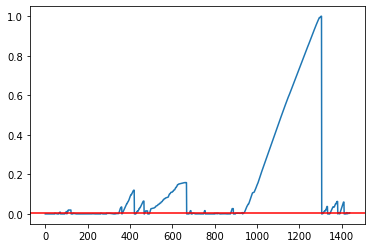

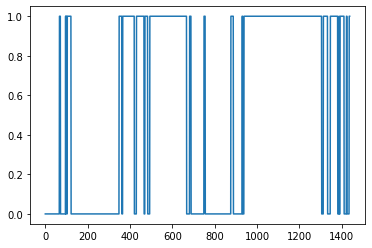

Video completed in  921.4589883309991  seconds


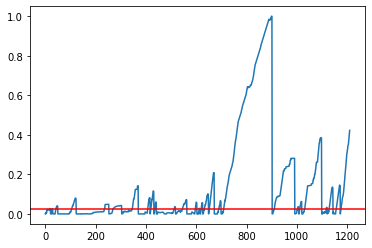

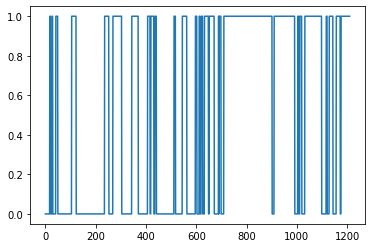

Video completed in  807.188014714  seconds


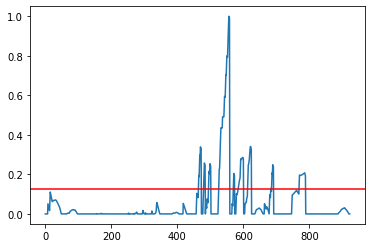

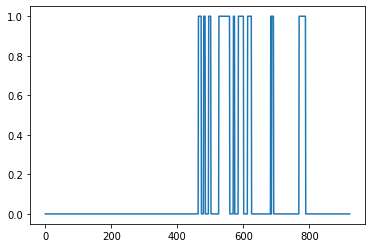

Video completed in  585.865114872  seconds


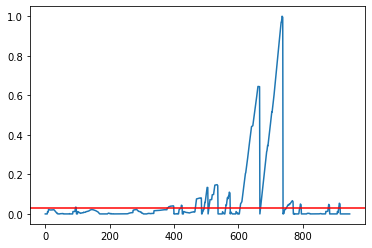

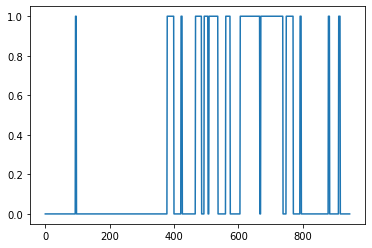

Video completed in  624.7719792330008  seconds


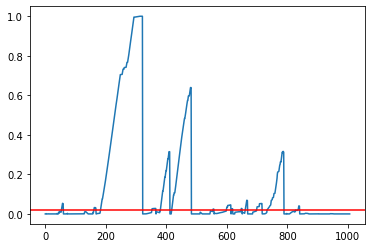

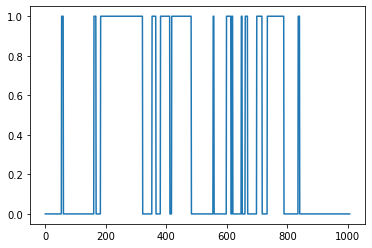

Video completed in  640.0885242730001  seconds


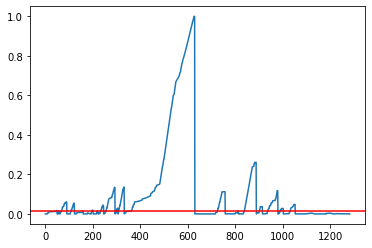

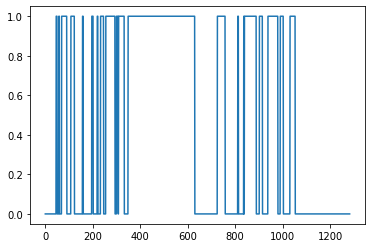

Video completed in  810.8945455980011  seconds


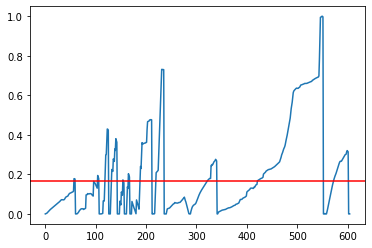

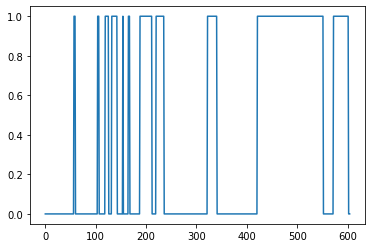

Video completed in  448.3968627710001  seconds


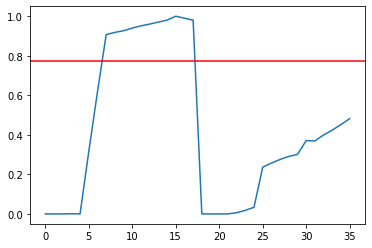

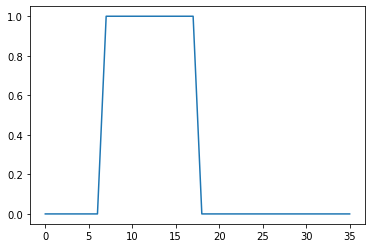

Video completed in  20.53042182900026  seconds


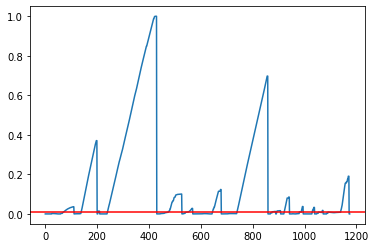

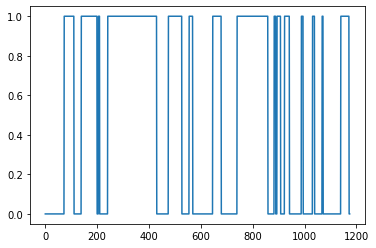

Video completed in  729.5837323560008  seconds


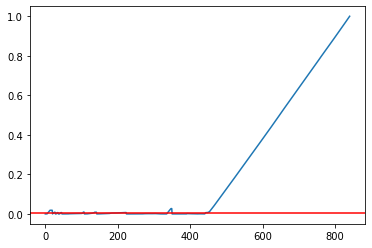

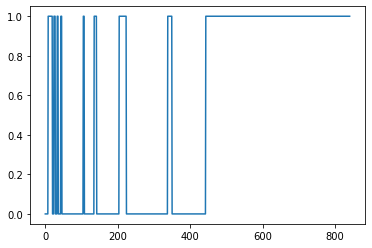

Video completed in  557.5578700379992  seconds


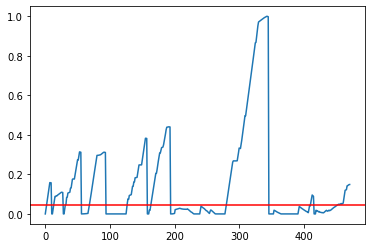

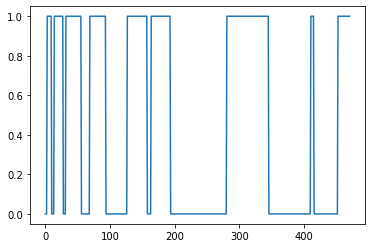

Video completed in  317.62603413299985  seconds


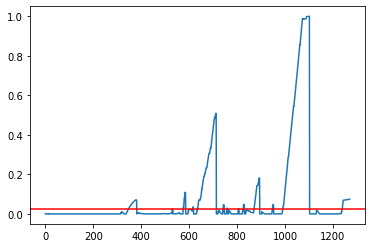

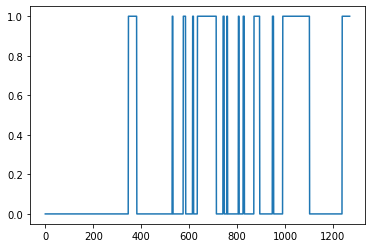

Video completed in  707.3553674880004  seconds


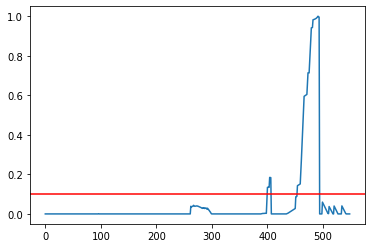

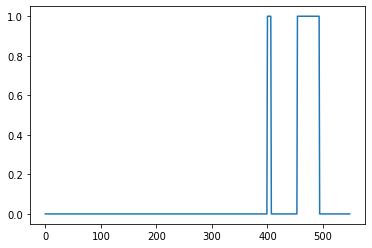

Video completed in  289.98502952799936  seconds


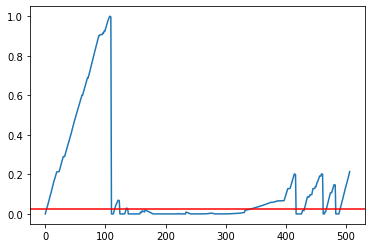

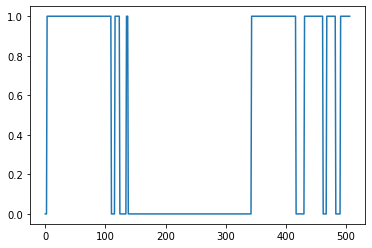

Video completed in  360.21200393899926  seconds


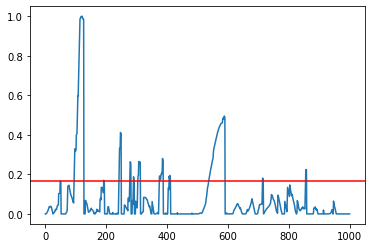

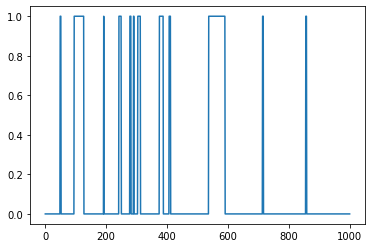

Video completed in  729.5012766750006  seconds


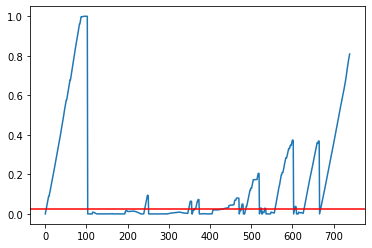

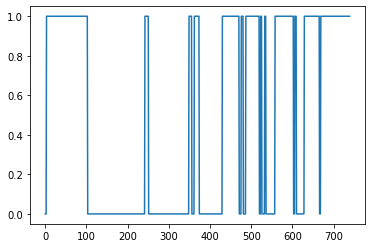

Video completed in  553.4485848069999  seconds


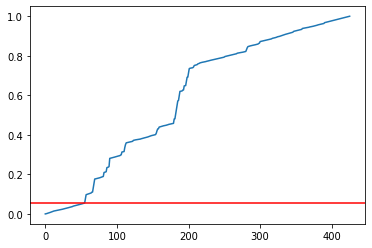

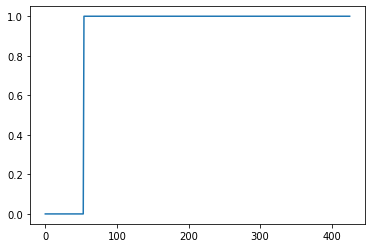

Video completed in  341.33768065500044  seconds


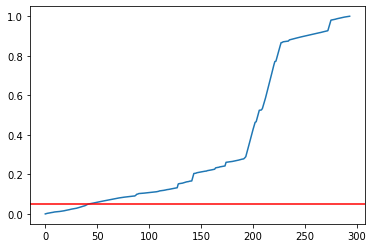

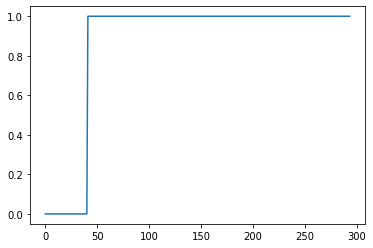

Video completed in  225.0050195570002  seconds


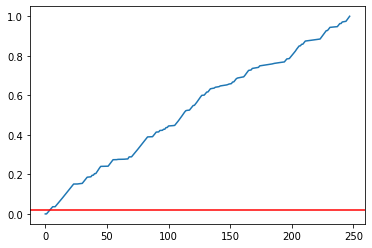

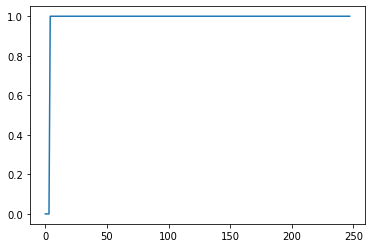

Video completed in  224.49260814599984  seconds


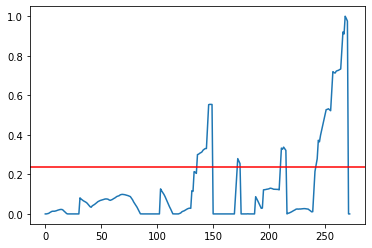

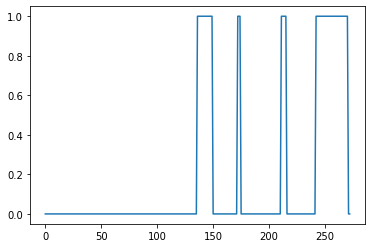

Video completed in  194.06828765299724  seconds


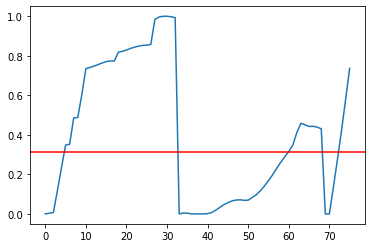

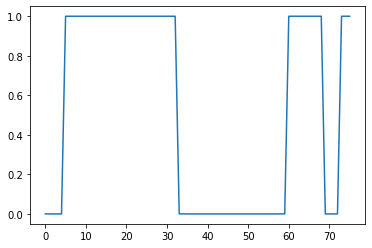

Video completed in  58.20018741400054  seconds
AV2
 [array([0, 0, 0, ..., 1, 1, 1]), array([0, 0, 0, ..., 1, 1, 1]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       

In [46]:
open_('avenue',g_min,g_max)